In [1]:
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
data = pd.read_csv("D:\CSVFiles\churn.csv")

In [3]:
data.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


In [4]:
data = data.drop(['RowNumber', 'CustomerId','Surname'], axis=1)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
CreditScore        10000 non-null int64
Geography          10000 non-null object
Gender             10000 non-null object
Age                10000 non-null int64
Tenure             10000 non-null int64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [6]:
data['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [7]:
data['Gender'].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

In [8]:
data['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [9]:
MV = data[data['Gender'].isna() == True]

In [10]:
MV

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited


In [11]:
feature_set = data.drop(['Exited'], axis=1)

In [12]:
target_set = data['Exited']

In [13]:
feature_set.head(10)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10
5,645,Spain,Male,44,8,113755.78,2,1,0,149756.71
6,822,France,Male,50,7,0.00,2,1,1,10062.80
7,376,Germany,Female,29,4,115046.74,4,1,0,119346.88
8,501,France,Male,44,4,142051.07,2,0,1,74940.50
9,684,France,Male,27,2,134603.88,1,1,1,71725.73


In [14]:
target_set.head(10)

0    1
1    0
2    1
3    0
4    0
5    1
6    0
7    1
8    0
9    0
Name: Exited, dtype: int64

In [15]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
CreditScore,10000.0,650.528800,96.653299,350.00,584.00,652.000,718.0000,850.00
Age,10000.0,38.921800,10.487806,18.00,32.00,37.000,44.0000,92.00
Tenure,10000.0,5.012800,2.892174,0.00,3.00,5.000,7.0000,10.00
Balance,10000.0,76485.889288,62397.405202,0.00,0.00,97198.540,127644.2400,250898.09
NumOfProducts,10000.0,1.530200,0.581654,1.00,1.00,1.000,2.0000,4.00
HasCrCard,10000.0,0.705500,0.455840,0.00,0.00,1.000,1.0000,1.00
IsActiveMember,10000.0,0.515100,0.499797,0.00,0.00,1.000,1.0000,1.00
EstimatedSalary,10000.0,100090.239881,57510.492818,11.58,51002.11,100193.915,149388.2475,199992.48
Exited,10000.0,0.203700,0.402769,0.00,0.00,0.000,0.0000,1.00


In [16]:
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
print(feature_set['Geography'].head())
print(feature_set['Gender'].head())
label_encoder = LabelEncoder()
feature_set['Geography'] = label_encoder.fit_transform(feature_set['Geography'])
feature_set['Gender'] = label_encoder.fit_transform(feature_set['Gender'])
print(feature_set['Geography'].head())
print(feature_set['Gender'].head())

0    France
1     Spain
2    France
3    France
4     Spain
Name: Geography, dtype: object
0    Female
1    Female
2    Female
3    Female
4    Female
Name: Gender, dtype: object
0    0
1    2
2    0
3    0
4    2
Name: Geography, dtype: int32
0    0
1    0
2    0
3    0
4    0
Name: Gender, dtype: int32


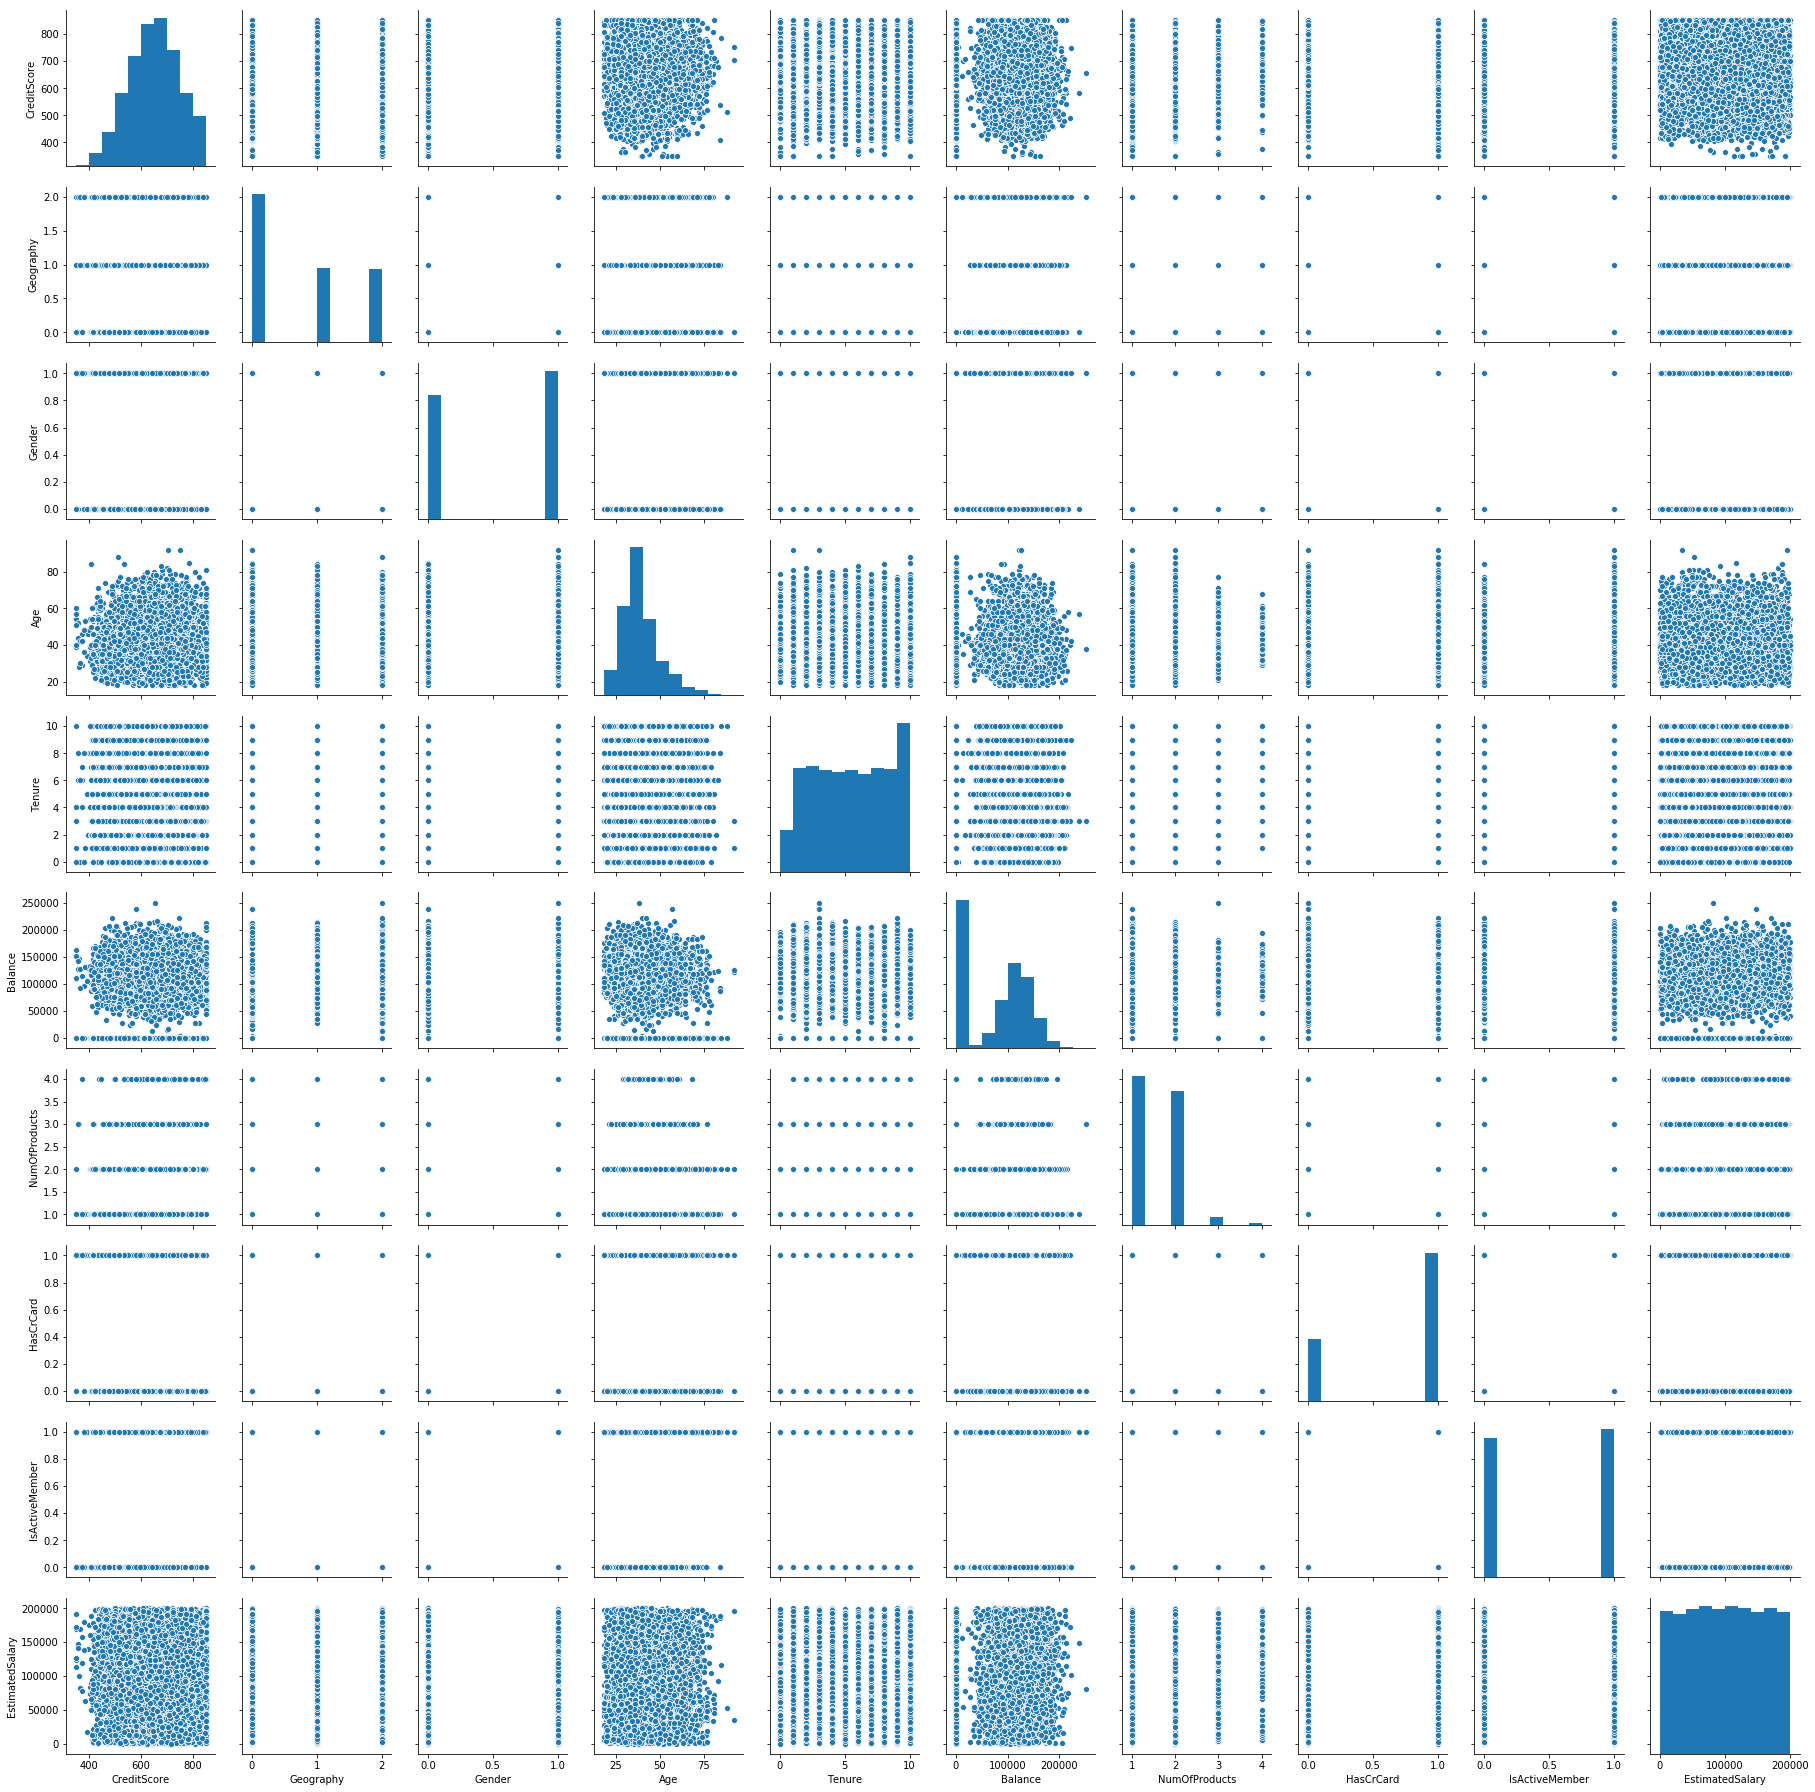

In [17]:
sns.pairplot(feature_set)

In [197]:
f = feature_set.to_numpy()

In [198]:
t = target_set.to_numpy()

In [199]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(f, t, test_size=0.30 , random_state=1)

In [200]:
y_train[0]

0

In [201]:
type(y_train)

numpy.ndarray

In [202]:
import tensorflow as tf
tf.random.set_seed(42)

In [203]:
tf.__version__

'2.0.0'

In [204]:
#y_train = tf.keras.utils.to_categorical(y_train, num_classes=2)
#y_test = tf.keras.utils.to_categorical(y_test, num_classes=2)

In [205]:
y_train[0]

0

In [206]:
model = tf.keras.models.Sequential()

In [207]:
X_train.shape

(7000, 10)

In [208]:
y_train[0]

0

In [209]:
y_train.shape

(7000,)

In [210]:
model.add(tf.keras.layers.Dense(1, input_shape=(10,)))

In [211]:
model.add(tf.keras.layers.BatchNormalization())

In [212]:
model.add(tf.keras.layers.Dense(2, activation='softmax'))

In [213]:
model.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [214]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100)

Train on 7000 samples, validate on 3000 samples
Epoch 1/100
7000/7000 [==============================] - 3s 402us/sample - loss: 0.6060 - accuracy: 0.7110 - val_loss: 0.5467 - val_accuracy: 0.7910
Epoch 2/100
7000/7000 [==============================] - 2s 325us/sample - loss: 0.5205 - accuracy: 0.7986 - val_loss: 0.5180 - val_accuracy: 0.7910
Epoch 3/100
7000/7000 [==============================] - 2s 334us/sample - loss: 0.5066 - accuracy: 0.7986 - val_loss: 0.5133 - val_accuracy: 0.7910
Epoch 4/100
7000/7000 [==============================] - 2s 349us/sample - loss: 0.5031 - accuracy: 0.7986 - val_loss: 0.5125 - val_accuracy: 0.7910
Epoch 5/100
7000/7000 [==============================] - 2s 334us/sample - loss: 0.5020 - accuracy: 0.7986 - val_loss: 0.5124 - val_accuracy: 0.7910
Epoch 6/100
7000/7000 [==============================] - 2s 350us/sample - loss: 0.5015 - accuracy: 0.7986 - val_loss: 0.5124 - val_accuracy: 0.7910
Epoch 7/100
7000/7000 [==============================] - 2

7000/7000 [==============================] - 2s 332us/sample - loss: 0.4954 - accuracy: 0.7986 - val_loss: 0.5074 - val_accuracy: 0.7910
Epoch 56/100
7000/7000 [==============================] - 2s 333us/sample - loss: 0.4950 - accuracy: 0.7986 - val_loss: 0.5074 - val_accuracy: 0.7910
Epoch 57/100
7000/7000 [==============================] - 3s 378us/sample - loss: 0.4950 - accuracy: 0.7986 - val_loss: 0.5073 - val_accuracy: 0.7910
Epoch 58/100
7000/7000 [==============================] - 3s 387us/sample - loss: 0.4949 - accuracy: 0.7986 - val_loss: 0.5073 - val_accuracy: 0.7910
Epoch 59/100
7000/7000 [==============================] - 3s 397us/sample - loss: 0.4949 - accuracy: 0.7986 - val_loss: 0.5073 - val_accuracy: 0.7910
Epoch 60/100
7000/7000 [==============================] - 3s 377us/sample - loss: 0.4954 - accuracy: 0.7986 - val_loss: 0.5073 - val_accuracy: 0.7910
Epoch 61/100
7000/7000 [==============================] - 3s 374us/sample - loss: 0.4953 - accuracy: 0.7986 - val

In [215]:
model1 = tf.keras.models.Sequential()
model1.add(tf.keras.layers.Dense(1, input_shape=(10,)))
model1.add(tf.keras.layers.BatchNormalization())

In [216]:
model1.add(tf.keras.layers.Dense(100, activation='sigmoid'))
model1.add(tf.keras.layers.Dense(50, activation='sigmoid'))
model1.add(tf.keras.layers.Dense(30, activation='sigmoid'))
model1.add(tf.keras.layers.Dense(2, activation='softmax'))

In [217]:
model1.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_37 (Dense)             (None, 1)                 11        
_________________________________________________________________
batch_normalization_18 (Batc (None, 1)                 4         
_________________________________________________________________
dense_38 (Dense)             (None, 100)               200       
_________________________________________________________________
dense_39 (Dense)             (None, 50)                5050      
_________________________________________________________________
dense_40 (Dense)             (None, 30)                1530      
_________________________________________________________________
dense_41 (Dense)             (None, 2)                 62        
Total params: 6,857
Trainable params: 6,855
Non-trainable params: 2
___________________________________________________

In [218]:
model1.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model1.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100)

Train on 7000 samples, validate on 3000 samples
Epoch 1/100
7000/7000 [==============================] - 3s 463us/sample - loss: 0.5052 - accuracy: 0.7986 - val_loss: 0.5125 - val_accuracy: 0.7910
Epoch 2/100
7000/7000 [==============================] - 2s 355us/sample - loss: 0.5025 - accuracy: 0.7986 - val_loss: 0.5125 - val_accuracy: 0.7910
Epoch 3/100
7000/7000 [==============================] - 2s 352us/sample - loss: 0.5027 - accuracy: 0.7986 - val_loss: 0.5125 - val_accuracy: 0.7910
Epoch 4/100
7000/7000 [==============================] - 3s 366us/sample - loss: 0.5027 - accuracy: 0.7986 - val_loss: 0.5125 - val_accuracy: 0.7910
Epoch 5/100
7000/7000 [==============================] - 3s 381us/sample - loss: 0.5025 - accuracy: 0.7986 - val_loss: 0.5124 - val_accuracy: 0.7910
Epoch 6/100
7000/7000 [==============================] - 3s 372us/sample - loss: 0.5027 - accuracy: 0.7986 - val_loss: 0.5124 - val_accuracy: 0.7910
Epoch 7/100
7000/7000 [==============================] - 3

7000/7000 [==============================] - 2s 342us/sample - loss: 0.5010 - accuracy: 0.7986 - val_loss: 0.5115 - val_accuracy: 0.7910
Epoch 56/100
7000/7000 [==============================] - 2s 352us/sample - loss: 0.5011 - accuracy: 0.7986 - val_loss: 0.5110 - val_accuracy: 0.7910
Epoch 57/100
7000/7000 [==============================] - 3s 372us/sample - loss: 0.5010 - accuracy: 0.7986 - val_loss: 0.5110 - val_accuracy: 0.7910
Epoch 58/100
7000/7000 [==============================] - 2s 353us/sample - loss: 0.5007 - accuracy: 0.7986 - val_loss: 0.5109 - val_accuracy: 0.7910
Epoch 59/100
7000/7000 [==============================] - 2s 347us/sample - loss: 0.5007 - accuracy: 0.7986 - val_loss: 0.5112 - val_accuracy: 0.7910
Epoch 60/100
7000/7000 [==============================] - 2s 344us/sample - loss: 0.5008 - accuracy: 0.7986 - val_loss: 0.5114 - val_accuracy: 0.7910
Epoch 61/100
7000/7000 [==============================] - 2s 348us/sample - loss: 0.5006 - accuracy: 0.7986 - val

In [219]:
model.predict(X_test)

array([[0.8588822 , 0.14111784],
       [0.74501777, 0.2549823 ],
       [0.85904306, 0.14095692],
       ...,
       [0.71431273, 0.28568727],
       [0.75766283, 0.2423372 ],
       [0.7614926 , 0.23850736]], dtype=float32)

In [230]:
y_pred = model1.predict(X_test)

In [231]:
y_pred[0:10]

array([[0.83000463, 0.16999534],
       [0.7858153 , 0.21418467],
       [0.8300713 , 0.16992876],
       [0.7852023 , 0.21479765],
       [0.80714726, 0.1928527 ],
       [0.7859352 , 0.21406476],
       [0.80162996, 0.19837004],
       [0.8015513 , 0.19844866],
       [0.7987115 , 0.20128846],
       [0.8033257 , 0.19667432]], dtype=float32)

In [232]:
y_pred_class = model1.predict_classes(X_test) #default threshold is 0.5

In [233]:
y_pred_class[0:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [234]:
y_test[0:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [235]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [236]:
accuracy_score(y_test,y_pred_class)

0.791

In [238]:
confusion_matrix(y_pred_class, y_test)

array([[2373,  627],
       [   0,    0]], dtype=int64)